# Measuring Reward and Risk of an Investment

### General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [3]:
msft = pd.read_csv("../../Assets/Data-Files/msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-09-30,46.3600,NaN
2014-10-01,45.9000,-0.0099
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


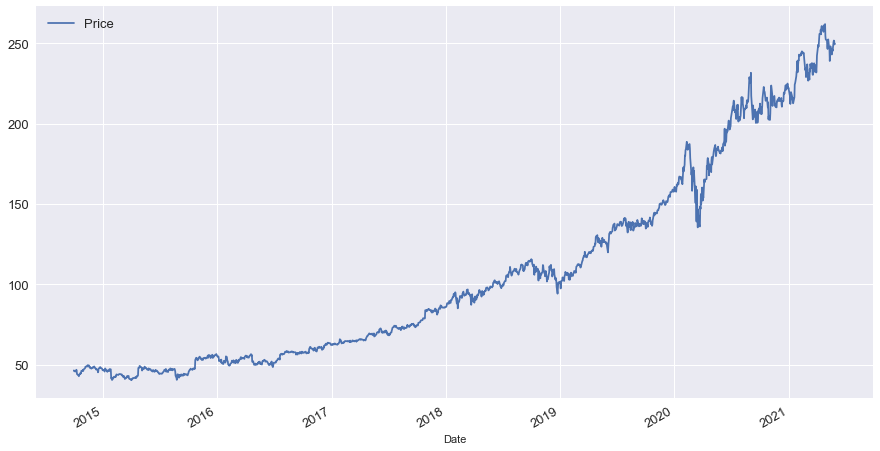

In [4]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

- Reward: Positive Returns
- Risk: Volatility of Returns

In [5]:
msft.describe() # 50th% percentile is the median

,Price,Returns
count,1678.0000,1677.0000
mean,106.2786,0.0012
std,60.7718,0.0173
min,40.2900,-0.1474
25%,54.8075,-0.0062
50%,89.6600,0.0009
75%,138.9000,0.0091
max,261.9700,0.1422


In [7]:
# artithmetic mean is a popular performance metric for reward
mu = msft.Returns.mean() # arithmetic mean return == Reward
mu

0.00115317350436645

In [8]:
# the standard deviation of returns is a popular performance metric for risk/volatility
sigma = msft.Returns.std() # standard deviation of returns == Risk/Volatility
sigma

0.01725305214536767

In [9]:
# sidenote: standard deviation is the square root of the variance
np.sqrt(msft.Returns.var())

0.01725305214536767

## Coding Challenge

1. Calculate the daily returns of Bitcoin
2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin
3. Compare Bitcoin with Microsoft: Does the rule "Higher Risk == Higher Reward" hold?

In [11]:
close = pd.read_csv("../../Assets/Data-Files/close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,1.2691,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [14]:
# focusing on a single instrument, in this case Bitcoin
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

,BTC-USD
Date,
2014-09-30,386.9440
2014-10-01,383.6150
2014-10-02,375.0720
2014-10-03,359.5120
2014-10-04,328.8660
...,...
2021-05-26,39294.1992
2021-05-27,38436.9688
2021-05-28,35697.6055


In [18]:
# change column header
btc.rename(columns = {"BTC-USD":"Price"}, inplace = True)
btc

,Price
Date,
2014-09-30,386.9440
2014-10-01,383.6150
2014-10-02,375.0720
2014-10-03,359.5120
2014-10-04,328.8660
...,...
2021-05-26,39294.1992
2021-05-27,38436.9688
2021-05-28,35697.6055


In [19]:
# shift elements in a column by a desired number of periods
# periods = 1 shifts prices forward by one day
btc.shift(periods = 1)

,Price
Date,
2014-09-30,NaN
2014-10-01,386.9440
2014-10-02,383.6150
2014-10-03,375.0720
2014-10-04,359.5120
...,...
2021-05-26,38402.2227
2021-05-27,39294.1992
2021-05-28,38436.9688


In [20]:
# use build in Python method to calculate the percentage change
btc["Returns"] = btc.Price.pct_change(periods = 1) 
btc

,Price,Returns
Date,,
2014-09-30,386.9440,NaN
2014-10-01,383.6150,-0.0086
2014-10-02,375.0720,-0.0223
2014-10-03,359.5120,-0.0415
2014-10-04,328.8660,-0.0852
...,...,...
2021-05-26,39294.1992,0.0232
2021-05-27,38436.9688,-0.0218
2021-05-28,35697.6055,-0.0713


In [21]:
btc.to_csv("../../Assets/Data-Files/btc.csv")

In [22]:
btc = pd.read_csv("../../Assets/Data-Files/btc.csv", index_col = "Date", parse_dates = ["Date"])
btc

,Price,Returns
Date,,
2014-09-30,386.9440,NaN
2014-10-01,383.6150,-0.0086
2014-10-02,375.0720,-0.0223
2014-10-03,359.5120,-0.0415
2014-10-04,328.8660,-0.0852
...,...,...
2021-05-26,39294.1992,0.0232
2021-05-27,38436.9688,-0.0218
2021-05-28,35697.6055,-0.0713


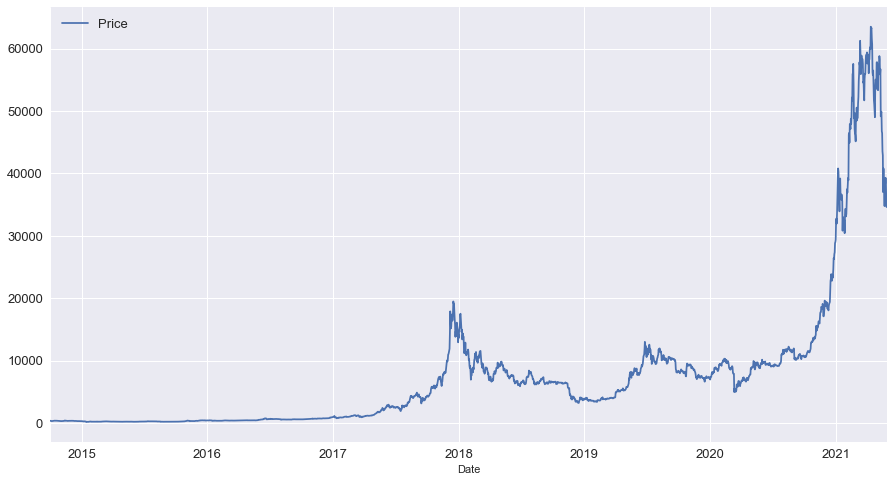

In [23]:
btc.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [24]:
msft.describe() # 50th% percentile is the median

,Price,Returns
count,1678.0000,1677.0000
mean,106.2786,0.0012
std,60.7718,0.0173
min,40.2900,-0.1474
25%,54.8075,-0.0062
50%,89.6600,0.0009
75%,138.9000,0.0091
max,261.9700,0.1422


In [25]:
# artithmetic mean is a popular performance metric for reward
btc_mu = btc.Returns.mean() # arithmetic mean return == Reward
btc_mu

0.002633138333693584

In [26]:
# the standard deviation of returns is a popular performance metric for risk/volatility
btc_sigma = btc.Returns.std() # standard deviation of returns == Risk/Volatility
btc_sigma

0.03911314807763489

In [27]:
# does have btc have a higher risk than msft?
btc_sigma > sigma

True

In [28]:
# does have btc have a higher returns than msft?
btc_mu > mu

True